In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [1]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32

In [ ]:
train_path = '/content/drive/MyDrive/emotion-model/shuffled_data(train).csv'
test_path = '/content/drive/MyDrive/emotion-model/shuffled_data(test).csv'
train_data = pd.read_csv(train_path, dtype=int, encoding='CP949')
test_data = pd.read_csv(test_path, dtype=int, encoding='CP949')

In [ ]:
class_labels=['Angry', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [ ]:
# 'label' 열을 제외한 모든 열을 NumPy 배열로 변환
train_input = train_data.drop('label', axis=1).values

# 'label' 열을 NumPy 배열로 변환
train_target = train_data['label'].values

# 'label' 열을 제외한 모든 열을 NumPy 배열로 변환
test_input = test_data.drop('label', axis=1).values

# 'label' 열을 NumPy 배열로 변환
test_target = test_data['label'].values


In [ ]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0
print(train_scaled.shape, test_scaled.shape, train_target.shape)

(28273, 2304) (7067, 2304) (28273,)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [ ]:
train_scaled = train_scaled.reshape(-1, 48, 48, 1)

In [ ]:
from keras.utils import to_categorical

train_target = to_categorical(train_target, num_classes=6)

In [ ]:
test_scaled = test_scaled.reshape(-1, 48, 48, 1)
from keras.utils import to_categorical

test_target = to_categorical(test_target, num_classes=6)

In [ ]:
history=model.fit(train_scaled,train_target,validation_data=(test_scaled, test_target),epochs=25,batch_size=32, )

Epoch 1/25


ValueError: ignored

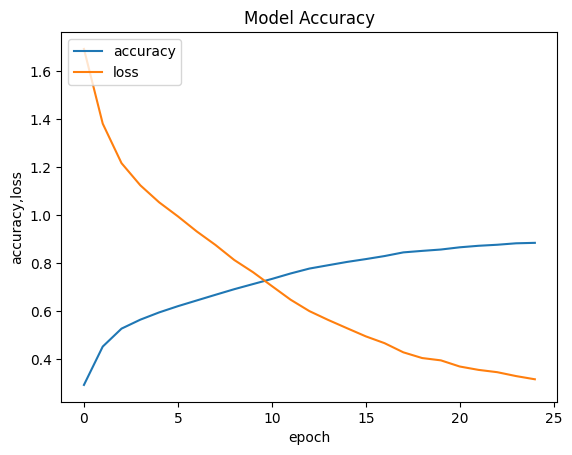

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['loss'])

plt.title('Model Accuracy')
plt.ylabel('accuracy,loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
test_scaled = test_scaled.reshape(-1, 48, 48, 1)

In [ ]:
from keras.utils import to_categorical

test_target = to_categorical(test_target, num_classes=6)


In [ ]:
model.evaluate(test_scaled, test_target)

221/221 [==============================] - 1s 4ms/step - loss: 1.7874 - accuracy: 0.5954


[1.7874020338058472, 0.595443606376648]

In [ ]:
model.save('emotion_detection_model_15epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
